# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cirq as cq
import stim
import pymatching as pm
import stimcirq as sc
import pickle
from datetime import date

from src.noisify import *
from src.circuit_generation import generate_split_circuit
from src.cirq_glue import *
from src.qutrit_gates import *


In [2]:
%load_ext autoreload
%autoreload 2

# Stim Infra

Loading noise model from Ottema benchmarking data

In [3]:
with open("noise_model.pkl", "rb") as f:
    noise_model = pickle.load(f)

with open("coherence_times.pkl", 'rb') as f:
    coherence_times = pickle.load(f)

t1, t2e ,t2s = [],[],[]
for qb in noise_model:
    if f"qb{qb}" in coherence_times:
        noise_model[qb]['t1'] = coherence_times[f'qb{qb}']['t1']
        noise_model[qb]['t2_star'] = coherence_times[f'qb{qb}']['t2_star']
        noise_model[qb]['t2_echo'] = coherence_times[f'qb{qb}']['t2_echo']
        
        t1.append(coherence_times[f'qb{qb}']['t1'])
        t2s.append(coherence_times[f'qb{qb}']['t2_star'])
        t2e.append(coherence_times[f'qb{qb}']['t2_echo'])

noise_model['average']['t1'] = np.average(t1)
noise_model['average']['t2_echo'] = np.average(t2e)
noise_model['average']['t2_star'] = np.average(t2s)

In [4]:
stim_circuit, mtrack = generate_split_circuit(initialize='z',
                                 readout='zz',
                                 full_idles=3,
                                 split_idles=2,
                                 rotate=True,
                                 init_detectors=True,
                                 x_detectors='all',
                                 z_detectors='all',
                                 arb_init=False)
converter = stim_circuit.compile_m2d_converter()

# Add noise
noisy_circuit = noisify(stim_circuit, noise_model=noise_model, 
                        pipelined=True, virtual_z=True,
                        average=False)

# Typical fancy objects that go with a stim circuit
dem = noisy_circuit.detector_error_model(decompose_errors=True)
# det_sampler =  noisy_circuit.compile_detector_sampler()
mmt_sampler = noisy_circuit.compile_sampler()
match = pm.Matching(dem)

# Here is a graph to play with 
dem.diagram("match-graph-3d")

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":3,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":4,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":5,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":6,"byteOffset":0,"componentType":5126,"count":1646,"max":[28.9532718658447,27.4208183288574,39.6756896972656],"min":[-7.13416624069214,-9.50910377502441,-9.67568874359131],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":7,"byteOffset":0,"componentType":5126,"count":230,"max":[19.9079856872559,12.5208339691162,30],"min":[0.187573909759521,6.33333349227905,-9.99635601043701],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":1,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":2,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":3,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":4,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":5,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":6,"byteLength":19752,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":7,"byteLength":2760,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":19752,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,OY6DQFZVVUAAAAAAwNrYPsAgqb1LUQrBHMchQVZVVUAAAAAAjNMdQfhOrr5PwhTBjuOAQVZVVUAAAAAAsyKbQfB4Db5hkQzBOY6DQFZVdUEAAAAAaFHePtmVlkHU6gnBHMchQVZVdUEAAAAA7tYdQeitmEHuQhTBjuOAQVZVdUEAAAAAnw6bQXEJl0Ha

## Converting to cirq infra

In [5]:
clean_cirq_circuit = clean_stim_conversion(sc.stim_circuit_to_cirq_circuit(
                        stim_circuit))

Run the simulation

In [16]:
shots = 10000

simulator = cq.Simulator()

results = simulator.run(cirq_circuit, repetitions=shots)
mmts = results.data.to_numpy(dtype=np.bool_)
dets, log_ops = converter.convert(measurements=results.data.to_numpy(dtype=np.bool_), 
                            separate_observables=True)


Or just load previous results

In [33]:
# today = date.today().strftime('%Y%m%d')

# import pickle
# with open(f"{today}_z_zz_10000_results.pkl", 'wb') as f:
#     pickle.dump(results, f)

with open("20250331_z_zz_10000_results.pkl", 'rb') as f:
    results = pickle.load(f)
mmts = results.data.to_numpy(dtype=np.bool_)
dets, log_ops = converter.convert(measurements=results.data.to_numpy(dtype=np.bool_), 
                            separate_observables=True)

In [34]:
get_operator_values(mmts, dets, match, mtrack)

{'raw': -0.2208,
 'decoded': -0.5858,
 'post_selected': -1.0,
 'shots_raw': 10000,
 'shots_decoded': 10000,
 'shots_ps': 232}

## Comparing to stim simulation

In [32]:
stim_mmts = mmt_sampler.sample(10000)
stim_dets, stim_log_ops = converter.convert(measurements=stim_mmts, 
                            separate_observables=True)


get_operator_values(stim_mmts, stim_dets, match, mtrack)

{'raw': -0.222,
 'decoded': -0.6294,
 'post_selected': -1.0,
 'shots_raw': 10000,
 'shots_decoded': 10000,
 'shots_ps': 251}

# Figure 3

## Verifying stim setup works

Lets do that by recreating figure 3

In [109]:
today = date.today().strftime('%Y%m%d')

## Stim Simulation

In [27]:
factors = [1]
shots = 100000
ros = ['zz', 'xx', 'yy']

stim_data = {ro: {factor: {}
            for factor in factors} for ro in ros}

for readout in ['zz', 'xx', 'yy']:
    for factor in factors:
        stim_data[readout][factor] = get_expectation(shots=shots, readout=readout,
                                    noise_model=noise_model, factor=factor,
                                    simulation='stim', arb_init=False)
        print('.', end='')
    print(readout, end='')
print('!')

.zz.xx.yy!


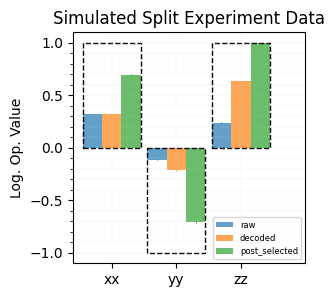

In [ ]:
# organizing data
groups = ['xx', 'yy', 'zz']
raw_data = np.asarray([stim_data[group][1]['raw'] for group in groups])
decoded_data = np.asarray([stim_data[group][1]['decoded'] for group in groups])
post_selected_data = np.asarray([stim_data[group][1]['post_selected'] for group in groups])
shots_raw = np.asarray([stim_data[group][1]['shots_raw'] for group in groups])
shots_decoded = np.asarray([stim_data[group][1]['shots_decoded'] for group in groups])
shots_ps = np.asarray([stim_data[group][1]['shots_ps'] for group in groups])

xs = np.array(range(3))

plt.figure(figsize=(3,3))
bar_width = .3

# Raw
plt.bar(xs - bar_width, raw_data, bar_width, label='raw', alpha=.7)
plt.errorbar(xs - bar_width, raw_data, yerr=np.sqrt(((1+raw_data)*(1-raw_data))/shots_raw), 
             linestyle=' ', linewidth=.7)
# Decoded
plt.bar(xs + 0., decoded_data, bar_width, label='decoded', alpha=.7)
plt.errorbar(xs - 0, decoded_data, yerr=np.sqrt(((1+decoded_data)*(1-decoded_data))/shots_decoded), 
             linestyle=' ', linewidth=.7)
# Post-selected
plt.bar(xs + bar_width, post_selected_data, bar_width, label='post_selected', alpha=.7)
plt.errorbar(xs + bar_width, post_selected_data, yerr=np.sqrt(((1+post_selected_data)*(1-post_selected_data))/shots_ps), 
             linestyle=' ', linewidth=.7)
# Outlines
plt.bar(xs, [1, -1, 1], 3*bar_width, alpha=1, 
        color='none', edgecolor='black', linestyle='dashed')

# Nicities
plt.xticks(xs, groups)
plt.ylabel('Log. Op. Value')
plt.legend(fontsize=6)
plt.grid(which='both', color='lightgray', linewidth=.1)
plt.yticks(ticks=np.linspace(-1, 1, 5))
plt.yticks(ticks=np.linspace(-1, 1, 21), minor=True)
plt.xlim(-.6, 3)
plt.title('Simulated Split Experiment Data')
today = date.today().strftime('%Y%m%d')
# plt.savefig(f'figs/{today}_stim_fig3_{shots}.png')
plt.show()

## Cirq Simulation

This is with the stim noise model

In [12]:
factors = [1]
shots = 10000
ros = ['zz', 'xx', 'yy']

cirq_data = {ro: {factor: {}
            for factor in factors} for ro in ros}

for readout in ['zz', 'xx', 'yy']:
    for factor in factors:
        cirq_data[readout][factor] = get_expectation(shots=shots, readout=readout,
                                    noise_model=noise_model, factor=factor,
                                    simulation='cirq', arb_init=False,
                                    cirq_method='stim')
        print('.', end='')
    print(readout, end='')
print('!')

.zz.xx.yy!


In [13]:
today = date.today().strftime('%Y%m%d')
with open(f"simulation_data/{today}_z_all_{shots}_cirq_noarb.pkl", 'wb') as f:
    pickle.dump(cirq_data, f)

In [14]:
cirq_data

{'zz': {1: {'raw': 0.2284,
   'decoded': 0.6186,
   'post_selected': 1.0,
   'shots_raw': 10000,
   'shots_decoded': 10000,
   'shots_ps': 319}},
 'xx': {1: {'raw': 0.3366,
   'decoded': 0.3366,
   'post_selected': 0.6363636363636364,
   'shots_raw': 10000,
   'shots_decoded': 10000,
   'shots_ps': 363}},
 'yy': {1: {'raw': -0.1228,
   'decoded': -0.2318,
   'post_selected': -0.7393939393939394,
   'shots_raw': 10000,
   'shots_decoded': 10000,
   'shots_ps': 330}}}

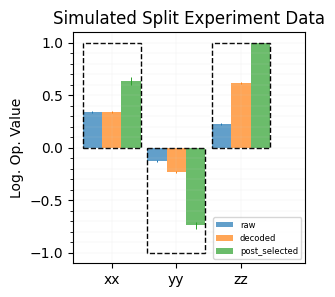

In [ ]:
# organizing data
groups = ['xx', 'yy', 'zz']
raw_data = np.asarray([cirq_data[group][1]['raw'] for group in groups])
decoded_data = np.asarray([cirq_data[group][1]['decoded'] for group in groups])
post_selected_data = np.asarray([cirq_data[group][1]['post_selected'] for group in groups])
shots_raw = np.asarray([cirq_data[group][1]['shots_raw'] for group in groups])
shots_decoded = np.asarray([cirq_data[group][1]['shots_decoded'] for group in groups])
shots_ps = np.asarray([cirq_data[group][1]['shots_ps'] for group in groups])

xs = np.array(range(3))

plt.figure(figsize=(3,3))
bar_width = .3

# Raw
plt.bar(xs - bar_width, raw_data, bar_width, label='raw', alpha=.7)
plt.errorbar(xs - bar_width, raw_data, yerr=np.sqrt(((1+raw_data)*(1-raw_data))/shots_raw), 
             linestyle=' ', linewidth=.7)
# Decoded
plt.bar(xs + 0., decoded_data, bar_width, label='decoded', alpha=.7)
plt.errorbar(xs - 0, decoded_data, yerr=np.sqrt(((1+decoded_data)*(1-decoded_data))/shots_decoded), 
             linestyle=' ', linewidth=.7)
# Post-selected
plt.bar(xs + bar_width, post_selected_data, bar_width, label='post_selected', alpha=.7)
plt.errorbar(xs + bar_width, post_selected_data, yerr=np.sqrt(((1+post_selected_data)*(1-post_selected_data))/shots_ps), 
             linestyle=' ', linewidth=.7)
# Outlines
plt.bar(xs, [1, -1, 1], 3*bar_width, alpha=1, 
        color='none', edgecolor='black', linestyle='dashed')

# Nicities
plt.xticks(xs, groups)
plt.ylabel('Log. Op. Value')
plt.legend(fontsize=6)
plt.grid(which='both', color='lightgray', linewidth=.1)
plt.yticks(ticks=np.linspace(-1, 1, 5))
plt.yticks(ticks=np.linspace(-1, 1, 21), minor=True)
plt.xlim(-.6, 3)
plt.title('Simulated Split Experiment Data')
today = date.today().strftime('%Y%m%d')
plt.savefig(f'figs/{today}_cirq_fig3_{shots}.png')
plt.show()

## Cirq with idle enhancement

In [16]:
factors = [1]
shots = 10000
ros = ['zz', 'xx', 'yy']

idle_data = {ro: {factor: {}
            for factor in factors} for ro in ros}

for readout in ['zz', 'xx', 'yy']:
    for factor in factors:
        idle_data[readout][factor] = get_expectation(shots=shots, readout=readout,
                                    noise_model=noise_model, factor=factor,
                                    simulation='cirq', arb_init=False,
                                    cirq_method="idle")
        print('.', end='')
    print(readout, end='')
print('!')

.zz.xx.yy!


In [17]:
today = date.today().strftime('%Y%m%d')
with open(f"simulation_data/{today}_z_all_{shots}_cirq_idle.pkl", 'wb') as f:
    pickle.dump(idle_data, f)

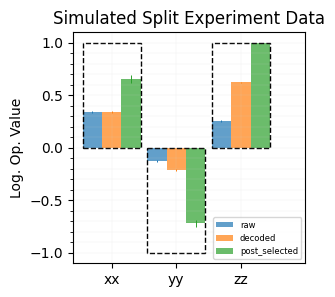

In [ ]:
# organizing data
groups = ['xx', 'yy', 'zz']
data_set = idle_data
raw_data = np.asarray([data_set[group][1]['raw'] for group in groups])
decoded_data = np.asarray([data_set[group][1]['decoded'] for group in groups])
post_selected_data = np.asarray([data_set[group][1]['post_selected'] for group in groups])
shots_raw = np.asarray([data_set[group][1]['shots_raw'] for group in groups])
shots_decoded = np.asarray([data_set[group][1]['shots_decoded'] for group in groups])
shots_ps = np.asarray([data_set[group][1]['shots_ps'] for group in groups])

xs = np.array(range(3))

plt.figure(figsize=(3,3))
bar_width = .3

# Raw
plt.bar(xs - bar_width, raw_data, bar_width, label='raw', alpha=.7)
plt.errorbar(xs - bar_width, raw_data, yerr=np.sqrt(((1+raw_data)*(1-raw_data))/shots_raw), 
             linestyle=' ', linewidth=.7)
# Decoded
plt.bar(xs + 0., decoded_data, bar_width, label='decoded', alpha=.7)
plt.errorbar(xs - 0, decoded_data, yerr=np.sqrt(((1+decoded_data)*(1-decoded_data))/shots_decoded), 
             linestyle=' ', linewidth=.7)
# Post-selected
plt.bar(xs + bar_width, post_selected_data, bar_width, label='post_selected', alpha=.7)
plt.errorbar(xs + bar_width, post_selected_data, yerr=np.sqrt(((1+post_selected_data)*(1-post_selected_data))/shots_ps), 
             linestyle=' ', linewidth=.7)
# Outlines
plt.bar(xs, [1, -1, 1], 3*bar_width, alpha=1, 
        color='none', edgecolor='black', linestyle='dashed')

# Nicities
plt.xticks(xs, groups)
plt.ylabel('Log. Op. Value')
plt.legend(fontsize=6)
plt.grid(which='both', color='lightgray', linewidth=.1)
plt.yticks(ticks=np.linspace(-1, 1, 5))
plt.yticks(ticks=np.linspace(-1, 1, 21), minor=True)
plt.xlim(-.6, 3)
plt.title('Simulated Split Experiment Data')
today = date.today().strftime('%Y%m%d')
plt.savefig(f'figs/{today}_cirq_idle_fig3_{shots}.png')
plt.show()

## Comparing to Experiment Data

In [31]:
idle_data

{'zz': {1: {'raw': 0.253,
   'decoded': 0.6218,
   'post_selected': 1.0,
   'shots_raw': 10000,
   'shots_decoded': 10000,
   'shots_ps': 382}},
 'xx': {1: {'raw': 0.339,
   'decoded': 0.339,
   'post_selected': 0.6540284360189573,
   'shots_raw': 10000,
   'shots_decoded': 10000,
   'shots_ps': 422}},
 'yy': {1: {'raw': -0.1218,
   'decoded': -0.2106,
   'post_selected': -0.7175925925925926,
   'shots_raw': 10000,
   'shots_decoded': 10000,
   'shots_ps': 432}}}

In [ ]:
exp_data = {'xx': {'decoded': 0.20838734620545363,
  'raw': 0.2553728593845944,
  'postselect': 0.5640933572710951},
 'yy': {'decoded': -0.19926049510754384,
  'raw': -0.08256301573702474,
  'postselect': -0.5546038543897216},
 'zz': {'decoded': 0.7299629529231046,
  'raw': 0.18875937471762894,
  'postselect': 0.9983532317826266},
 'xy': {'decoded': -0.07627022488483437,
  'raw': -0.05630063312682965,
  'postselect': -0.183920313055852},
 'yx': {'decoded': -0.08518920876335323,
  'raw': -0.022858953467318477,
  'postselect': -0.21143663960465942}}

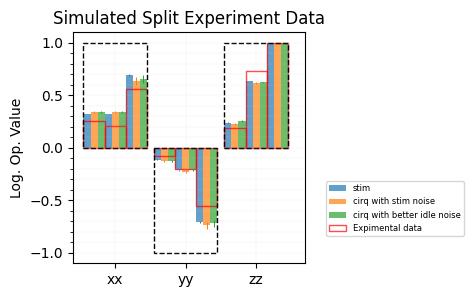

In [76]:

plt.figure(figsize=(3,3))


offset = -.1
c = 0
for data_set in [stim_data, cirq_data, idle_data]:
    # organizing data
    groups = ['xx', 'yy', 'zz']
    raw_data = np.asarray([data_set[group][1]['raw'] for group in groups])
    decoded_data = np.asarray([data_set[group][1]['decoded'] for group in groups])
    post_selected_data = np.asarray([data_set[group][1]['post_selected'] for group in groups])
    shots_raw = np.asarray([data_set[group][1]['shots_raw'] for group in groups])
    shots_decoded = np.asarray([data_set[group][1]['shots_decoded'] for group in groups])
    shots_ps = np.asarray([data_set[group][1]['shots_ps'] for group in groups])

    xs = np.array(range(3))

    bar_width = .1


    # Raw
    plt.bar(xs - 3*bar_width + offset, raw_data, bar_width, 
            # label='raw', 
            alpha=.7, color=f"C{c}")
    plt.errorbar(xs - 3*bar_width + offset, raw_data, yerr=np.sqrt(((1+raw_data)*(1-raw_data))/shots_raw), 
                linestyle=' ', linewidth=.7, color=f"C{c}")
    # Decoded
    plt.bar(xs + 0. + offset, decoded_data, bar_width, 
            # label='decoded', 
            alpha=.7, color=f"C{c}")
    plt.errorbar(xs - 0 + offset, decoded_data, yerr=np.sqrt(((1+decoded_data)*(1-decoded_data))/shots_decoded), 
                linestyle=' ', linewidth=.7, color=f"C{c}")
    # Post-selected
    plt.bar(xs + 3*bar_width + offset, post_selected_data, bar_width, 
            # label='post_selected', 
            label=f"{['stim', 'cirq with stim noise', 'cirq with better idle noise'][c]}",
            alpha=.7, color=f"C{c}")
    plt.errorbar(xs + 3* bar_width + offset, post_selected_data, yerr=np.sqrt(((1+post_selected_data)*(1-post_selected_data))/shots_ps), 
                linestyle=' ', linewidth=.7, color=f"C{c}")
    offset += .1
    c += 1
# Exp
raw_data = np.asarray([exp_data[group]['raw'] for group in groups])
decoded_data = np.asarray([exp_data[group]['decoded'] for group in groups])
post_selected_data = np.asarray([exp_data[group]['postselect'] for group in groups])
exp_bar_width = .3

# Raw
plt.bar(xs - exp_bar_width, raw_data, exp_bar_width, 
        # label='raw', 
        alpha=.7, color='none', edgecolor='red')
# Decoded
plt.bar(xs + 0, decoded_data, exp_bar_width, 
        # label='decoded', 
        alpha=.7, color='none', edgecolor='red')
# Post-selected
plt.bar(xs + exp_bar_width , post_selected_data, exp_bar_width, 
        # label='post_selected', 
        label="Expimental data",
        alpha=.7, color='none', edgecolor='red')
    

# Outlines
plt.bar(xs, [1, -1, 1], 3*3*bar_width, alpha=1, 
        color='none', edgecolor='black', linestyle='dashed')

# Nicities
plt.xticks(xs, groups)
plt.ylabel('Log. Op. Value')
plt.legend(fontsize=6, loc='lower right', bbox_to_anchor=(1.7,.1))
plt.grid(which='both', color='lightgray', linewidth=.1)
plt.yticks(ticks=np.linspace(-1, 1, 5))
plt.yticks(ticks=np.linspace(-1, 1, 21), minor=True)
plt.xlim(-.6, 2.7)
plt.title('Simulated Split Experiment Data')
today = date.today().strftime('%Y%m%d')
plt.savefig(f'figs/{today}_simulation_comparison.png')
plt.show()

# Qutrits

Can now call the method qutritify to convert a qubit based cirq circuit into a qutrit based circuit. This will convert all gates to act as they do to the qubit system. This needs to be done on a noiseless circuit, because the mixed unitaries and kraus channels do not have unitary descriptions at this point.

In [14]:
clean_stim_circuit, mtrack = generate_split_circuit(initialize='z',
                                 readout='zz',
                                 full_idles=3,
                                 split_idles=2,
                                 rotate=True,
                                 init_detectors=True,
                                 x_detectors='all',
                                 z_detectors='all',
                                 arb_init=False)
noiseless_cirq_circuit = sc.stim_circuit_to_cirq_circuit(clean_stim_circuit)
clean_cirq_circuit = clean_stim_conversion(noiseless_cirq_circuit)
clean_qutrit_circuit = qutritify(clean_cirq_circuit)

clean_qutrit_circuit

┌──┐               ┌──┐                                  ┌──┐               ┌──┐                                   ┌──┐               ┌──┐                                  ┌──┐               ┌──┐                                   ┌──┐               ┌──┐                                  ┌──┐               ┌──┐                                   ┌──┐               ┌──┐
1 (d=3): ────M('5')──────────────────────────────────────────────────────────────Y^0.5──────────@───────Z────@─────────Y^-0.5───M('23')─────────────────────────────────────────────────────────────Y^0.5──────────@───────Z────@─────────Y^-0.5───M('31')─────────────────────────────────────────────────────────────Y^0.5──────────@───────Z────@─────────Y^-0.5───M('39')─────────────────────────────────────────────────────────────Y^0.5───@───────Z───@───Y^-0.5───M('50')───Y^0.5───@───────Z───@───Y^-0.5───M('57')───
                                                                                                │            │                                                                                                     │            │                                                                                                     │            │                                                                                              │           │                              │           │
2 (d=3): ────M('7')────Y^-0.5────@─────────Y───Z──────────────Y^-0.5────────────────────────────@───Y───Z────┼────────────────────────────Y^-0.5────@─────────Y───Z──────────────Y^-0.5────────────────────────────@───Y───Z────┼────────────────────────────Y^-0.5────@─────────Y───Z──────────────Y^-0.5────────────────────────────@───Y───Z────┼────────────────────────────Y^-0.5────@─────────Y───Z──────────────Y^-0.5─────────────────────@───Y───Z───┼──────────────────────────────@───Y───Z───┼────────────M('59')───
                                 │                                                                           │                                      │                                                                           │                                      │                                                                           │                                      │                                                                   │                                          │
3 (d=3): ────M('15')───Y^-0.5────┼─────────Y───Z──────────@───Y^-0.5──────────────────────@─────────Y───Z────@────────────────────────────Y^-0.5────┼─────────Y───Z──────────@───Y^-0.5──────────────────────@─────────Y───Z────@────────────────────────────Y^-0.5────┼─────────Y───Z──────────@───Y^-0.5──────────────────────@─────────Y───Z────@────────────────────────────Y^-0.5────┼─────────Y───Z──────────@───Y^-0.5─────────────────────@───Y───Z───@──────────────────────────────@───Y───Z───@────────────M('67')───
                                 │                        │                               │                                                         │                        │                               │                                                         │                        │                               │                                                         │                        │                              │                                          │
4 (d=3): ────M('0')────Y^0.5─────@─────@─────────────@────@───Y^-0.5───M('17')────────────┼───────────────────────────────────────────────Y^0.5─────@─────@─────────────@────@───Y^-0.5───M('25')────────────┼───────────────────────────────────────────────Y^0.5─────@─────@─────────────@────@───Y^-0.5───M('33')────────────┼───────────────────────────────────────────────Y^0.5─────@─────@─────────────@────@───Y^-0.5───M('41')───────────┼──────────────────────────────────────────┼────────────────────────M('52')───
                                       │             │                                    │                           

In [15]:
qutrit_noisify_stim(clean_qutrit_circuit, noise_model=noise_model)

┌──┐   ┌─────────────────────────────────┐                                                                                                                                 ┌──┐   ┌─────────────────────────────────┐                                                                                                                                                                                         ┌──┐   ┌─────────────────────────────────┐                                                                                                                                 ┌──┐   ┌─────────────────────────────────┐                                                                                                                                                                                          ┌──┐   ┌─────────────────────────────────┐                                                                                                                                 ┌──┐   ┌─────────────────────────────────┐                                                                                                                                                                                         ┌──┐   ┌─────────────────────────────────┐                                                                                                                                 ┌──┐   ┌─────────────────────────────────┐                                                                                                                                                                                          ┌──┐   ┌─────────────────────────────────┐                                                                                                                                 ┌──┐   ┌─────────────────────────────────┐                                                                                                                                                                                         ┌──┐   ┌─────────────────────────────────┐                                                                                                                                 ┌──┐   ┌─────────────────────────────────┐                                                                                                                                                                                          ┌──┐   ┌─────────────────────────────────┐                                                                                                                                 ┌──┐   ┌─────────────────────────────────┐                                                                                                                                                                                             ┌──────────────────────┐                                                                                                  ┌──────────────────────┐                                                                                                                                                          ┌──────────────────────┐                                                                                                  ┌──────────────────────┐
1 (d=3): ────BF(p=0.010660643794117634)───M('5')─────────────────────────AD(0.00104)───PF(0.000651)───────────────AD(0.00303)──────────────────────────PF(0.0019)───────────AD(0.00303)───PF(0.0019)───────────AD(0.00104)───PF(0.000651)───────────AD(0.00104)───PF(0.000651)───────────────AD(0.00303)──────────────────────────PF(0.0019)───────────AD(0.00303)───PF(0.0019)────────────────AD(0.00104)───PF(0.000651)──────────────────────────────────────────────────────Y^0.5───D(0.000903)──────────────────────────────AD(0.00303)──────────────────────────PF(0.0019)───────@───D(0.0223)──────────────────────────AD(0.00104)───PF(0.000651)───────Z───D(0.000903)───────────────────────@──────D(0.0223)─────────────────────────────────────────────────AD(0.00303)───PF(0.